In [1]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K
from tensorflow.keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline 

Using TensorFlow backend.


In [2]:
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
test_datagenerator = ImageDataGenerator(rescale = 1.0/255)

In [3]:
train_data = train_datagenerator.flow_from_directory('./Cotton Disease/train',
                                                    target_size = (224,224),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')
test_data = test_datagenerator.flow_from_directory('./Cotton Disease/val',
                                                  target_size = (224,224),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


In [4]:
dense = DenseNet121(
                include_top=False,
                weights="imagenet",
                input_shape=(224,224, 3),
            )

In [5]:
inputs = tf.keras.Input(shape=(224, 224, 3))

x = dense(inputs, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
densenet121 (Model)          (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 4100      
Total params: 7,041,604
Trainable params: 6,957,956
Non-trainable params: 83,648
_________________________________________________________________


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])
run = model.fit(x = train_data, validation_data = test_data, epochs = 10, verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 31 steps, validate for 4 steps
Epoch 1/10
31/31 [==============================] - 482s 16s/step - loss: 1.3537 - categorical_accuracy: 0.3203 - val_loss: 1.2189 - val_categorical_accuracy: 0.5375
Epoch 2/10
31/31 [==============================] - 462s 15s/step - loss: 1.1848 - categorical_accuracy: 0.5812 - val_loss: 1.0273 - val_categorical_accuracy: 0.8458
Epoch 3/10
31/31 [==============================] - 463s 15s/step - loss: 1.0285 - categorical_accuracy: 0.7945 - val_loss: 0.9280 - val_categorical_accuracy: 0.8775
Epoch 4/10
31/31 [==============================] - 455s 15s/step - loss: 0.9270 - categorical_accuracy: 0.8862 - val_loss: 0.8785 - val_categorical_accuracy: 0.9012
Epoch 5/10
31/31 [==============================] - 460s 15s/step - loss: 0.8781 - categorical_accuracy: 0.9124 - val_loss: 0.8487 - val_categorical_accuracy: 0.9368
Epoch 6/10
31/31 [==============================] - 460s 15s/step - loss: 0.843

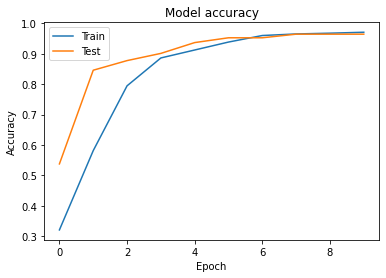

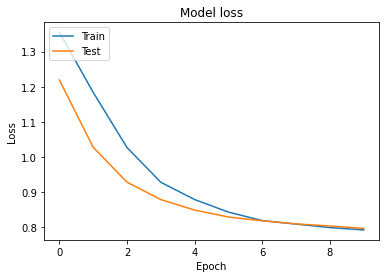

In [8]:
plt.plot(run.history['categorical_accuracy'])
plt.plot(run.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(run.history['loss'])
plt.plot(run.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()